# **PROJECT NAME - Zomato Restaurent Clustering and Sentiment analysis.**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **NAME -**            Vinay

# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two.

In conclusion, this project exemplifies the utility of clustering and  analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

# **Problem Statement**

The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [289]:
# importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer

### Dataset Loading

In [290]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
#importing dataset
df_rest_names = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zomato Restaurant names and Metadata.csv")
df_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zomato Restaurant reviews.csv")



In [292]:
#reading df_rest_names dataset :
df_rest_names.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [293]:
#reading df_reviews dataset :
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [294]:
# dateset shape
print('resturent dataset shape',df_rest_names.shape,'\n','Reviews dataset shape',df_reviews.shape)

resturent dataset shape (105, 6) 
 Reviews dataset shape (10000, 7)


In [295]:
# Dataset Info
df_rest_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [296]:
# Dataset Info
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [297]:
# missing valuse or null values count :
df_rest_names.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [298]:
# missing valuse or null values count :
df_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

### What did you know about your dataset?

* In this project we will be using two dataset namely resturent dataset and reviews dataset.

* There are 6 columns and 105 rows in the resturent dataset and 7 colunms and 10000 rows in the review dataset.

* Through dataset information we get to know that reviews dataset only Pictures colunms have integer value other are object.

* In resturent dataset we can see that there are no integer vlaues present all are object type data.

* there are null values in the Collections and timings colunms in the resturent dataset.

* Where as in reviews dataset Reviewer, review,Rating,Metadata,Time contains null values.

## ***2. Understanding Your Variables***

In [299]:
# Dataset Columns
print(f'Features : {df_rest_names.columns.to_list()}')
print(f'Features : {df_reviews.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [300]:
# dataset descrpition
df_rest_names.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [301]:
#dataset Description :
df_reviews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


## **Variable Description**

**Zomato Restaurant**

* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

In [302]:
# number of unique values in Zomato Restaurant dataset
for i in df_rest_names.columns.tolist():
   print("No. of unique values in ",i,"is",df_rest_names[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [303]:
# number of unique values in Zomato reviews dataset
for i in df_reviews.columns.tolist():
   print("No. of unique values in ",i,"is",df_reviews[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

In [304]:
# coverting cost from object tyep to int type :
df_rest_names['Cost'] = df_rest_names['Cost'].str.replace(",","").astype('int64')

In [305]:
# spliting the cusines and storing in list
cuisine_value_list = df_rest_names.Cuisines.str.split(', ')

In [306]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [307]:

# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [308]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [309]:
Collections_value_list = df_rest_names.Collections.dropna().str.split(', ')


# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [310]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


In [311]:
#hotels that share same price
hotel_dict = {}
amount = df_rest_names.Cost.values.tolist()
for price in amount:
    rows = df_rest_names[df_rest_names['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})
hotel_count = df_rest_names.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]


,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [312]:

#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


### Reviews

In [313]:
#in order to change data type for rating checking values
df_reviews.Rating.value_counts()


5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [314]:
#since there is one rating as like converting it to 0 since no rating is 0 then to median
df_reviews.loc[df_reviews['Rating'] == 'Like'] = 0
df_reviews['Rating'] = df_reviews['Rating'].astype('float')

In [315]:
#changing date and extracting few feature for manipulation

df_reviews['Reviewer_Total_Review'],df_reviews['Reviewer_Followers']=df_reviews['Metadata'].str.split(',').str
df_reviews['Reviewer_Total_Review'] = pd.to_numeric(df_reviews['Reviewer_Total_Review'].str.split(' ').str[0])
df_reviews['Reviewer_Followers'] = pd.to_numeric(df_reviews['Reviewer_Followers'].str.split(' ').str[1])
df_reviews['Time']=pd.to_datetime(df_reviews['Time'])
df_reviews['Review_Year'] = pd.DatetimeIndex(df_reviews['Time']).year
df_reviews['Review_Month'] = pd.DatetimeIndex(df_reviews['Time']).month
df_reviews['Review_Hour'] = pd.DatetimeIndex(df_reviews['Time']).hour

<ipython-input-315-edc7cf55bd59>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_reviews['Reviewer_Total_Review'],df_reviews['Reviewer_Followers']=df_reviews['Metadata'].str.split(',').str


In [316]:
#Average engagement of restaurants
avg_hotel_rating = df_reviews.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,0,0.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [317]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [318]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
0,0,0.00,1
42,Hotel Zara Hi-Fi,2.40,100
11,Asian Meal Box,2.58,100
67,Pakwaan Grand,2.71,100
58,Mathura Vilas,2.82,100


In [319]:
#Finding the most followed critic
most_followed_reviewer = df_reviews.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.0,13410.0,3.666667
1702,Eat_vth_me,60.0,13320.0,5.000000
5236,Samar Sardar,8.0,11329.0,3.500000
1788,Foodies Hyderabad,31.0,9494.0,4.500000
6230,Srinivas,34.0,7628.0,3.714286


In [320]:
#finding which year show maximum engagement
hotel_year = df_reviews.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,1970.0,[0],1
1,2016.0,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
2,2017.0,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
3,2018.0,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
4,2019.0,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [321]:
#merging both data frame
hotel = df_rest_names.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(df_reviews, on = 'Restaurant')
merged.shape

(9999, 17)

In [322]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [323]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [324]:
#price point for low rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


### What all manipulations have you done and insights you found?

* Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

* Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

* Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

* Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

* In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Maximum Engagement and Lowest Engagement

In [325]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

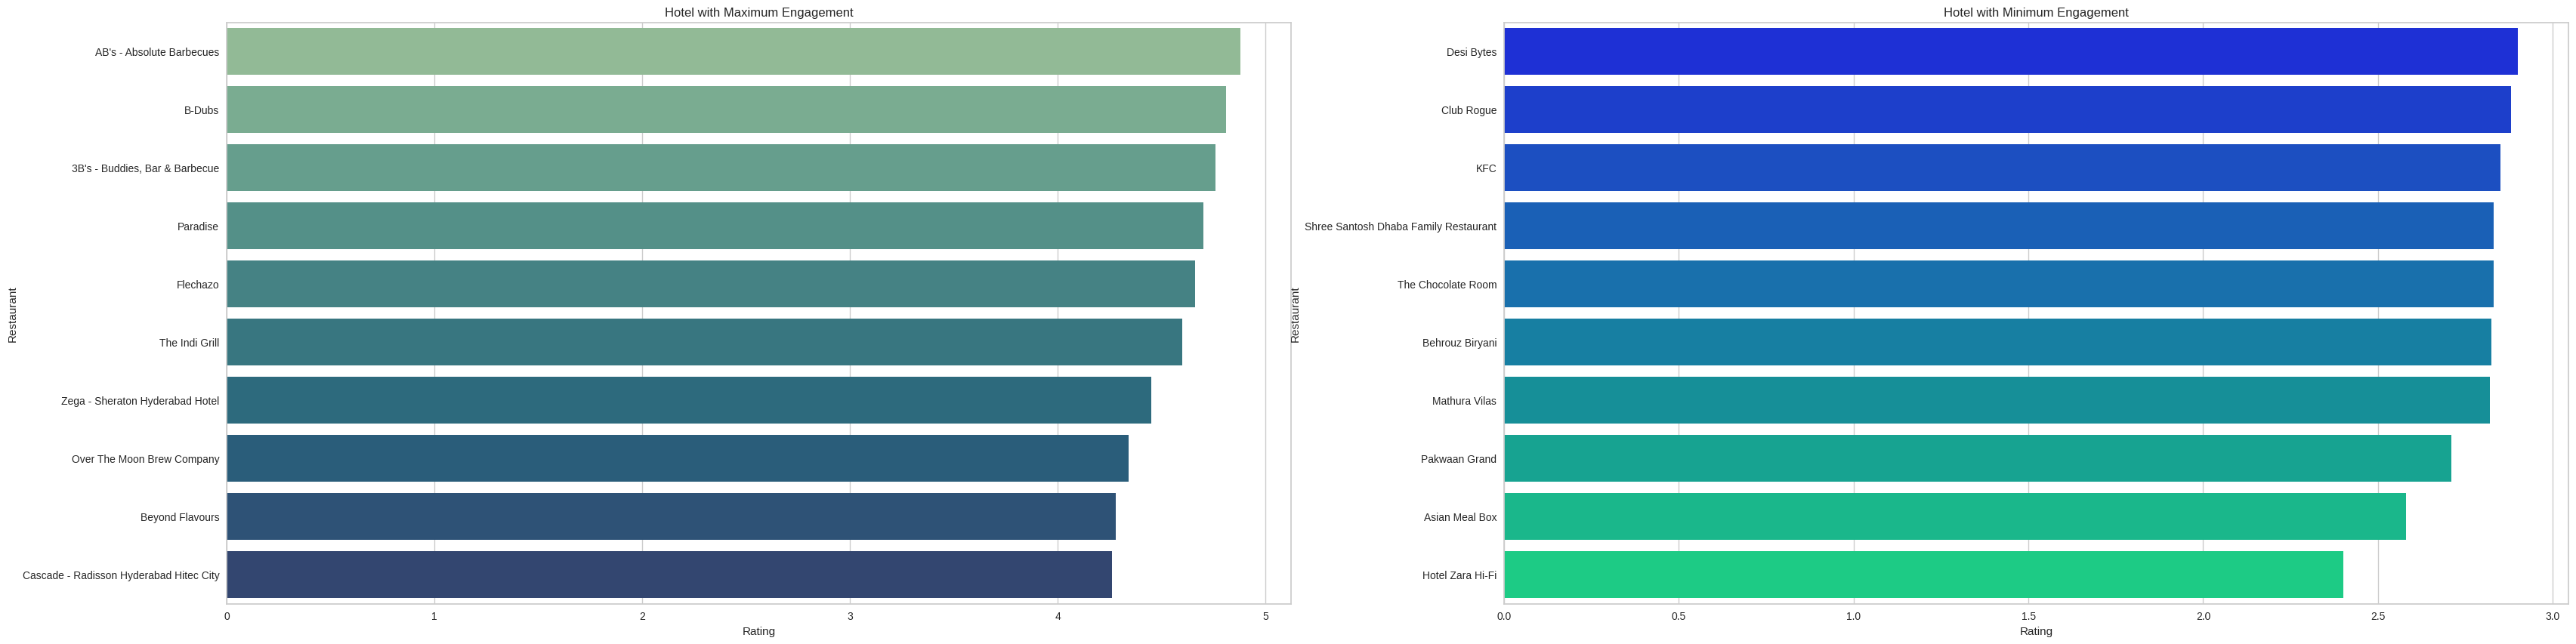

In [326]:
# ploting chart of 10 hotel with Maximum Engagement and Lowest Engagement:
fig, axes = plt.subplots(1, 2, figsize=(40, 10), sharey=False)
sns.barplot(data = most_engaged_hotel.head(10),x = 'Rating',y = 'Restaurant',palette='crest',ax = axes[0])
axes[0].set_title("Hotel with Maximum Engagement")
sns.barplot(data = most_engaged_hotel.tail(10),x = 'Rating', y = 'Restaurant',palette='winter', ax = axes[1])
axes[1].set_title("Hotel with Minimum Engagement")
plt.show()

* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

### Price Point for High Rated and Low Rated Hotels

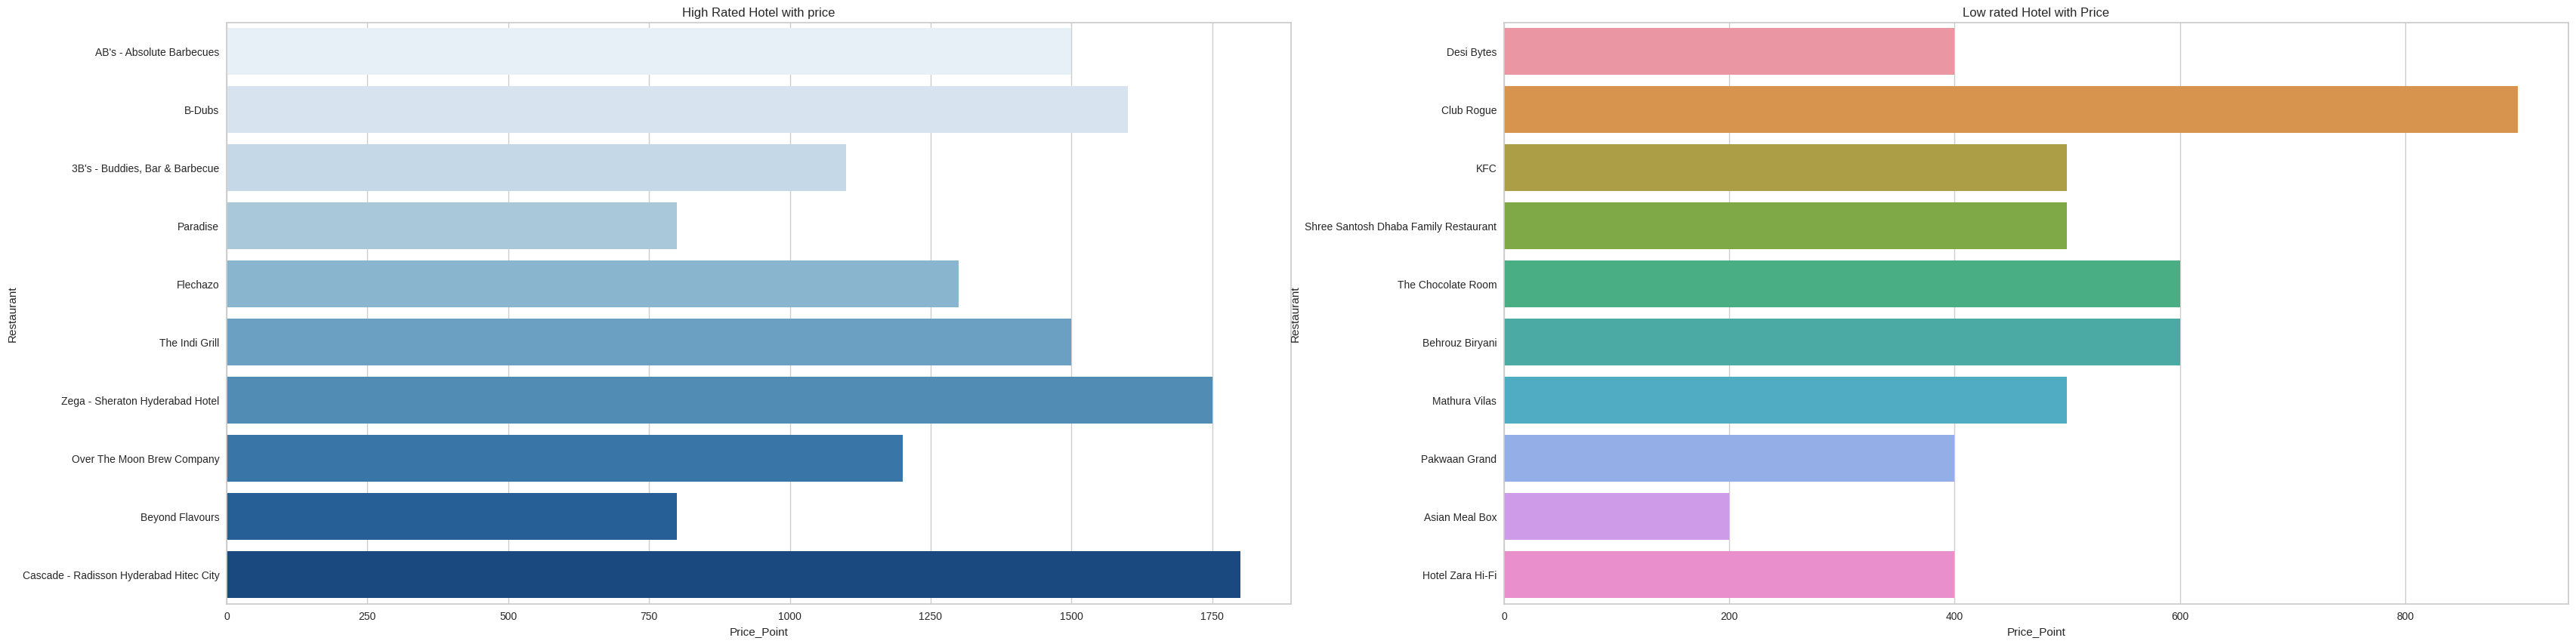

In [327]:
# ploing high rated hotels and low rated hotel with price points:
fig, axes = plt.subplots(1, 2, figsize=(40, 10), sharey=False)
sns.barplot(data = most_engaged_hotel.head(10),x = 'Price_Point',y = 'Restaurant',palette="Blues",ax = axes[0])
axes[0].set_title("High Rated Hotel with price")
sns.barplot(data = most_engaged_hotel.tail(10),x = 'Price_Point', y = 'Restaurant', ax = axes[1])
axes[1].set_title("Low rated Hotel with Price")
plt.show()

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.

### Proportion of Cuisine Sold by Most Restaurant

In [328]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

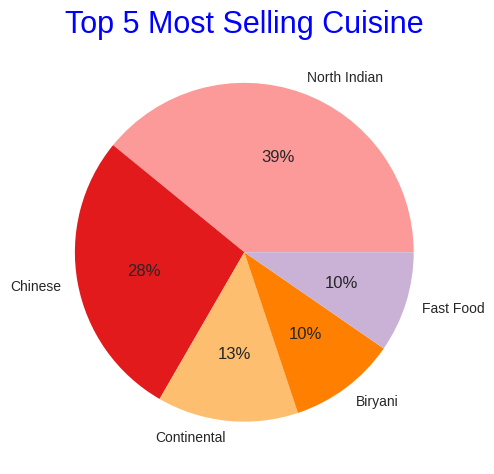

In [329]:
#visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]
labels = cuisine_list
colors = sns.color_palette('Paired')[4:9]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()


* Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

* Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.


### Most used Tags

In [330]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]

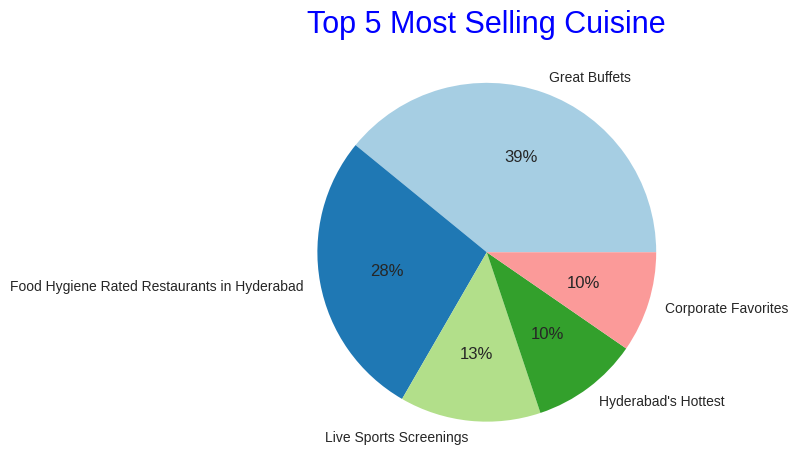

In [331]:
#visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]
labels = collection_list
colors = sns.color_palette('Paired')[:9]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Plotting a pie chart of tags used to describe food can help a restaurant review and food delivery platform Zomato to identify the most popular adjectives used to describe the food

### Most Popular Critics


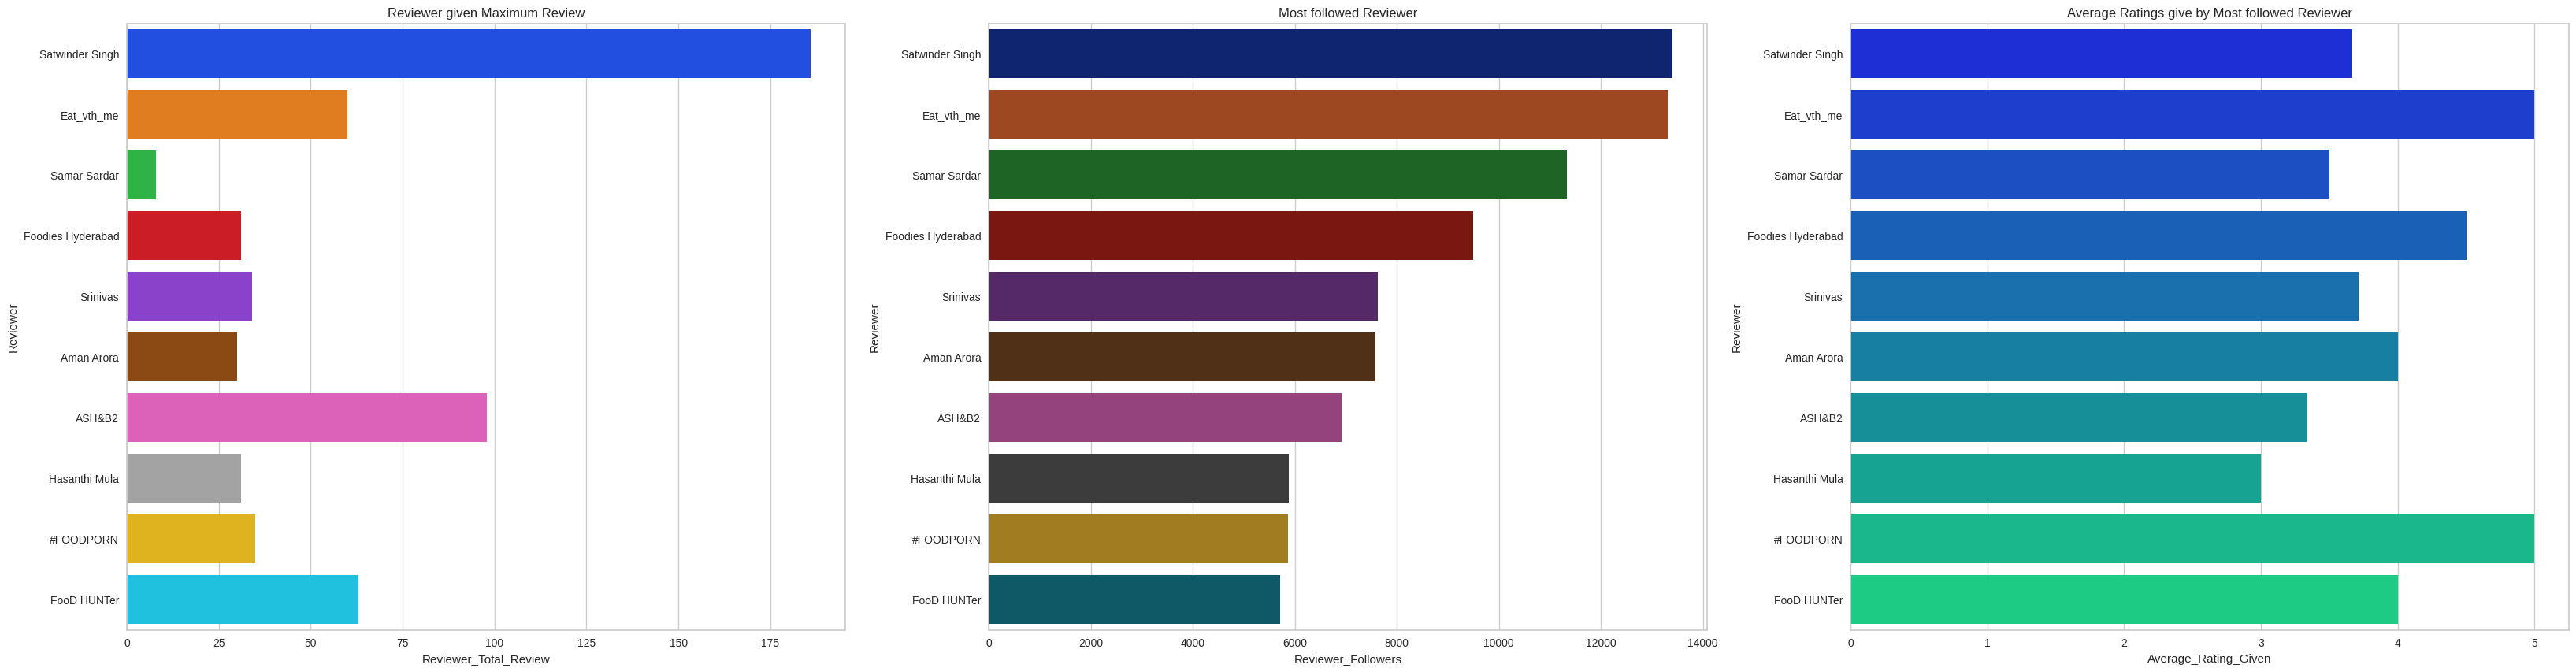

In [332]:
# Learn about Reviewers through plots
fig, axes = plt.subplots(1,3, figsize=(40, 10), sharey=False)
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright',ax = axes[0])
axes[0].set_title("Reviewer given Maximum Review")
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', y = 'Reviewer',palette='dark', ax = axes[1])
axes[1].set_title("Most followed Reviewer")
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', y = 'Reviewer',palette='winter', ax = axes[2])
axes[2].set_title('Average Ratings give by Most followed Reviewer')
plt.show()

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers

### Most Expensive Restaurant

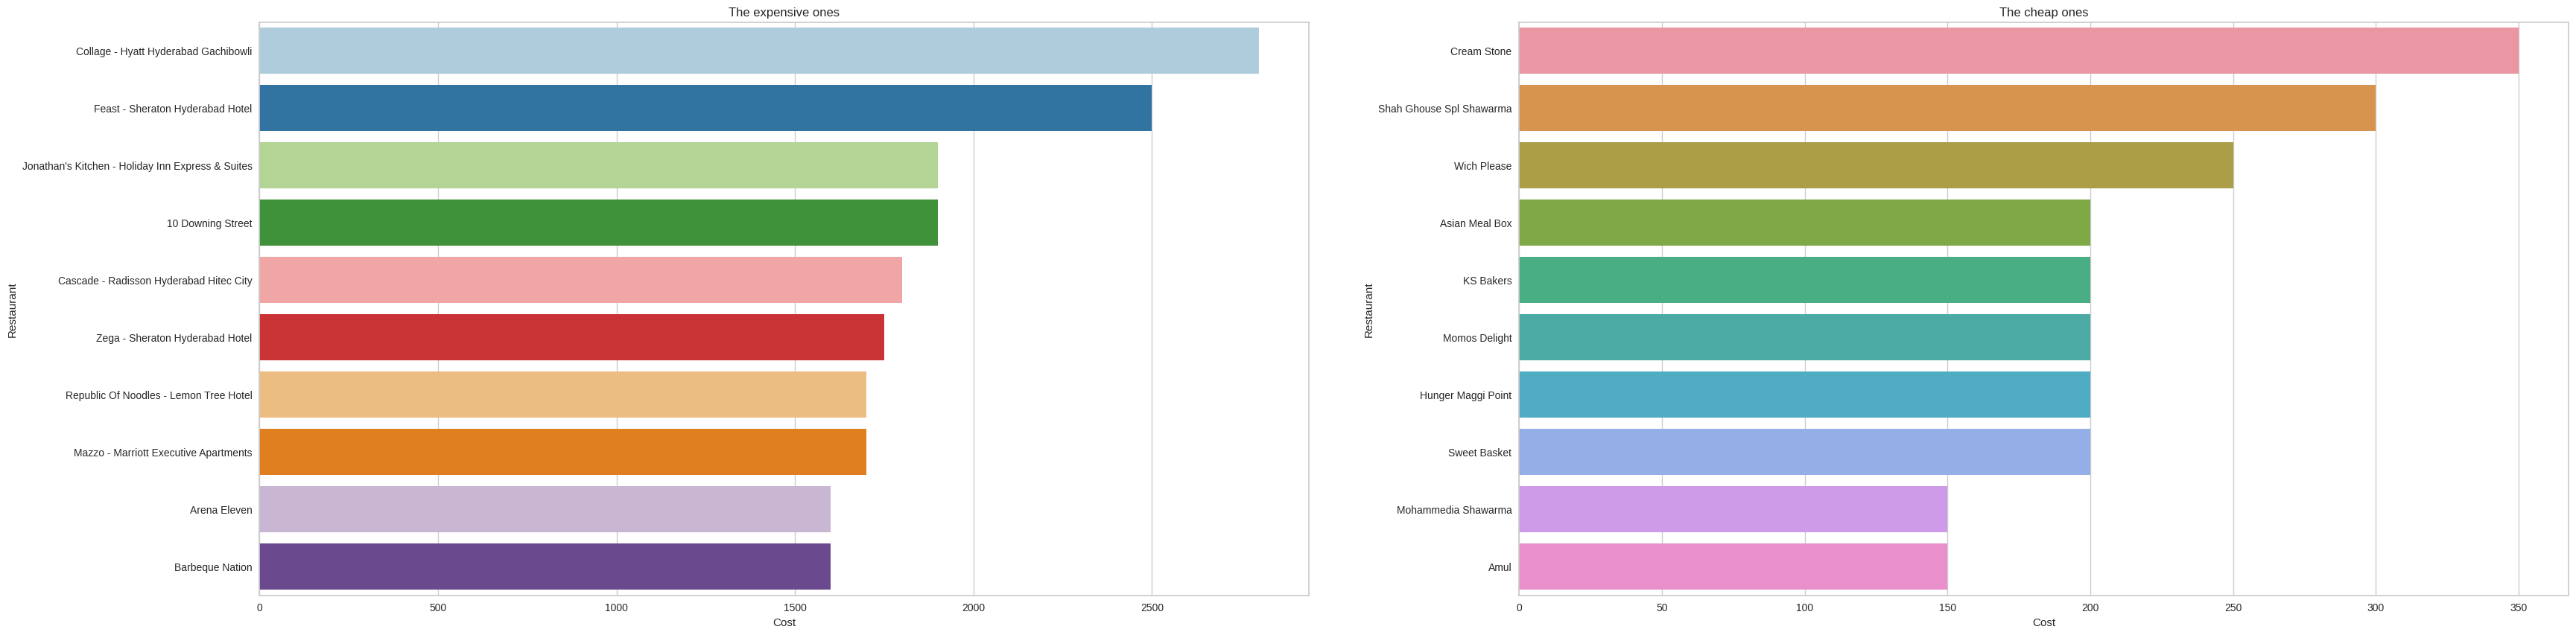

In [333]:
# Hotel with Highest Price and Lowest Price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
fig, axes = plt.subplots(1, 2, figsize=(40, 10), sharey=False)
sns.barplot(data = price_of_hotel.head(10),x = 'Cost',y = 'Restaurant',palette="Paired",ax = axes[0])
axes[0].set_title("The expensive ones")
sns.barplot(data = price_of_hotel.tail(10),x = 'Cost', y = 'Restaurant', ax = axes[1])
axes[1].set_title("The cheap ones")
plt.show()

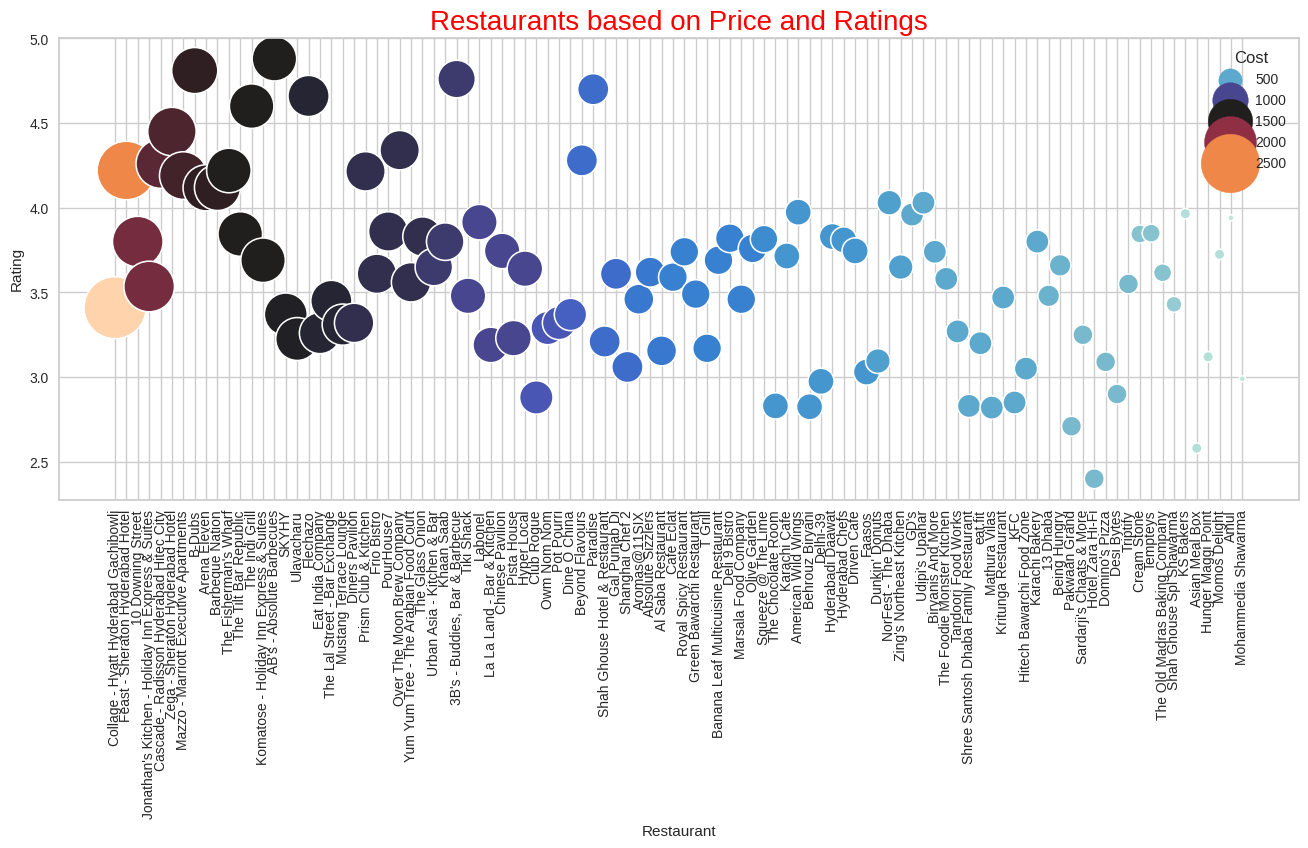

In [334]:
# merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

* Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.

* Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

* Most expensive product are always center of attraction for a niche market at the same time for a business purpose, this product are preffered to be most revenue generating market.



### Correlation Heatmap

<ipython-input-335-49f37ff32e69>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)


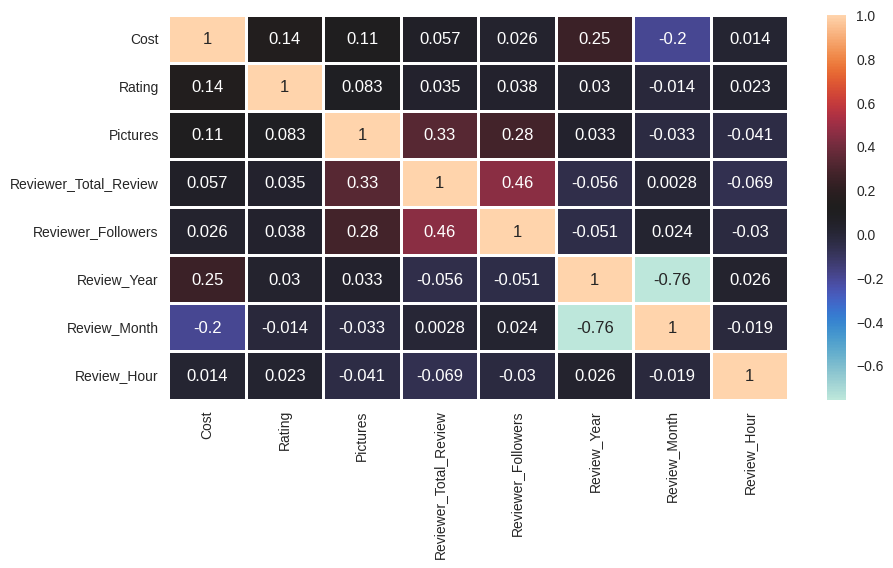

In [335]:
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

* From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

* Rest all correlation can be depicted from the above char

### Pair Plot

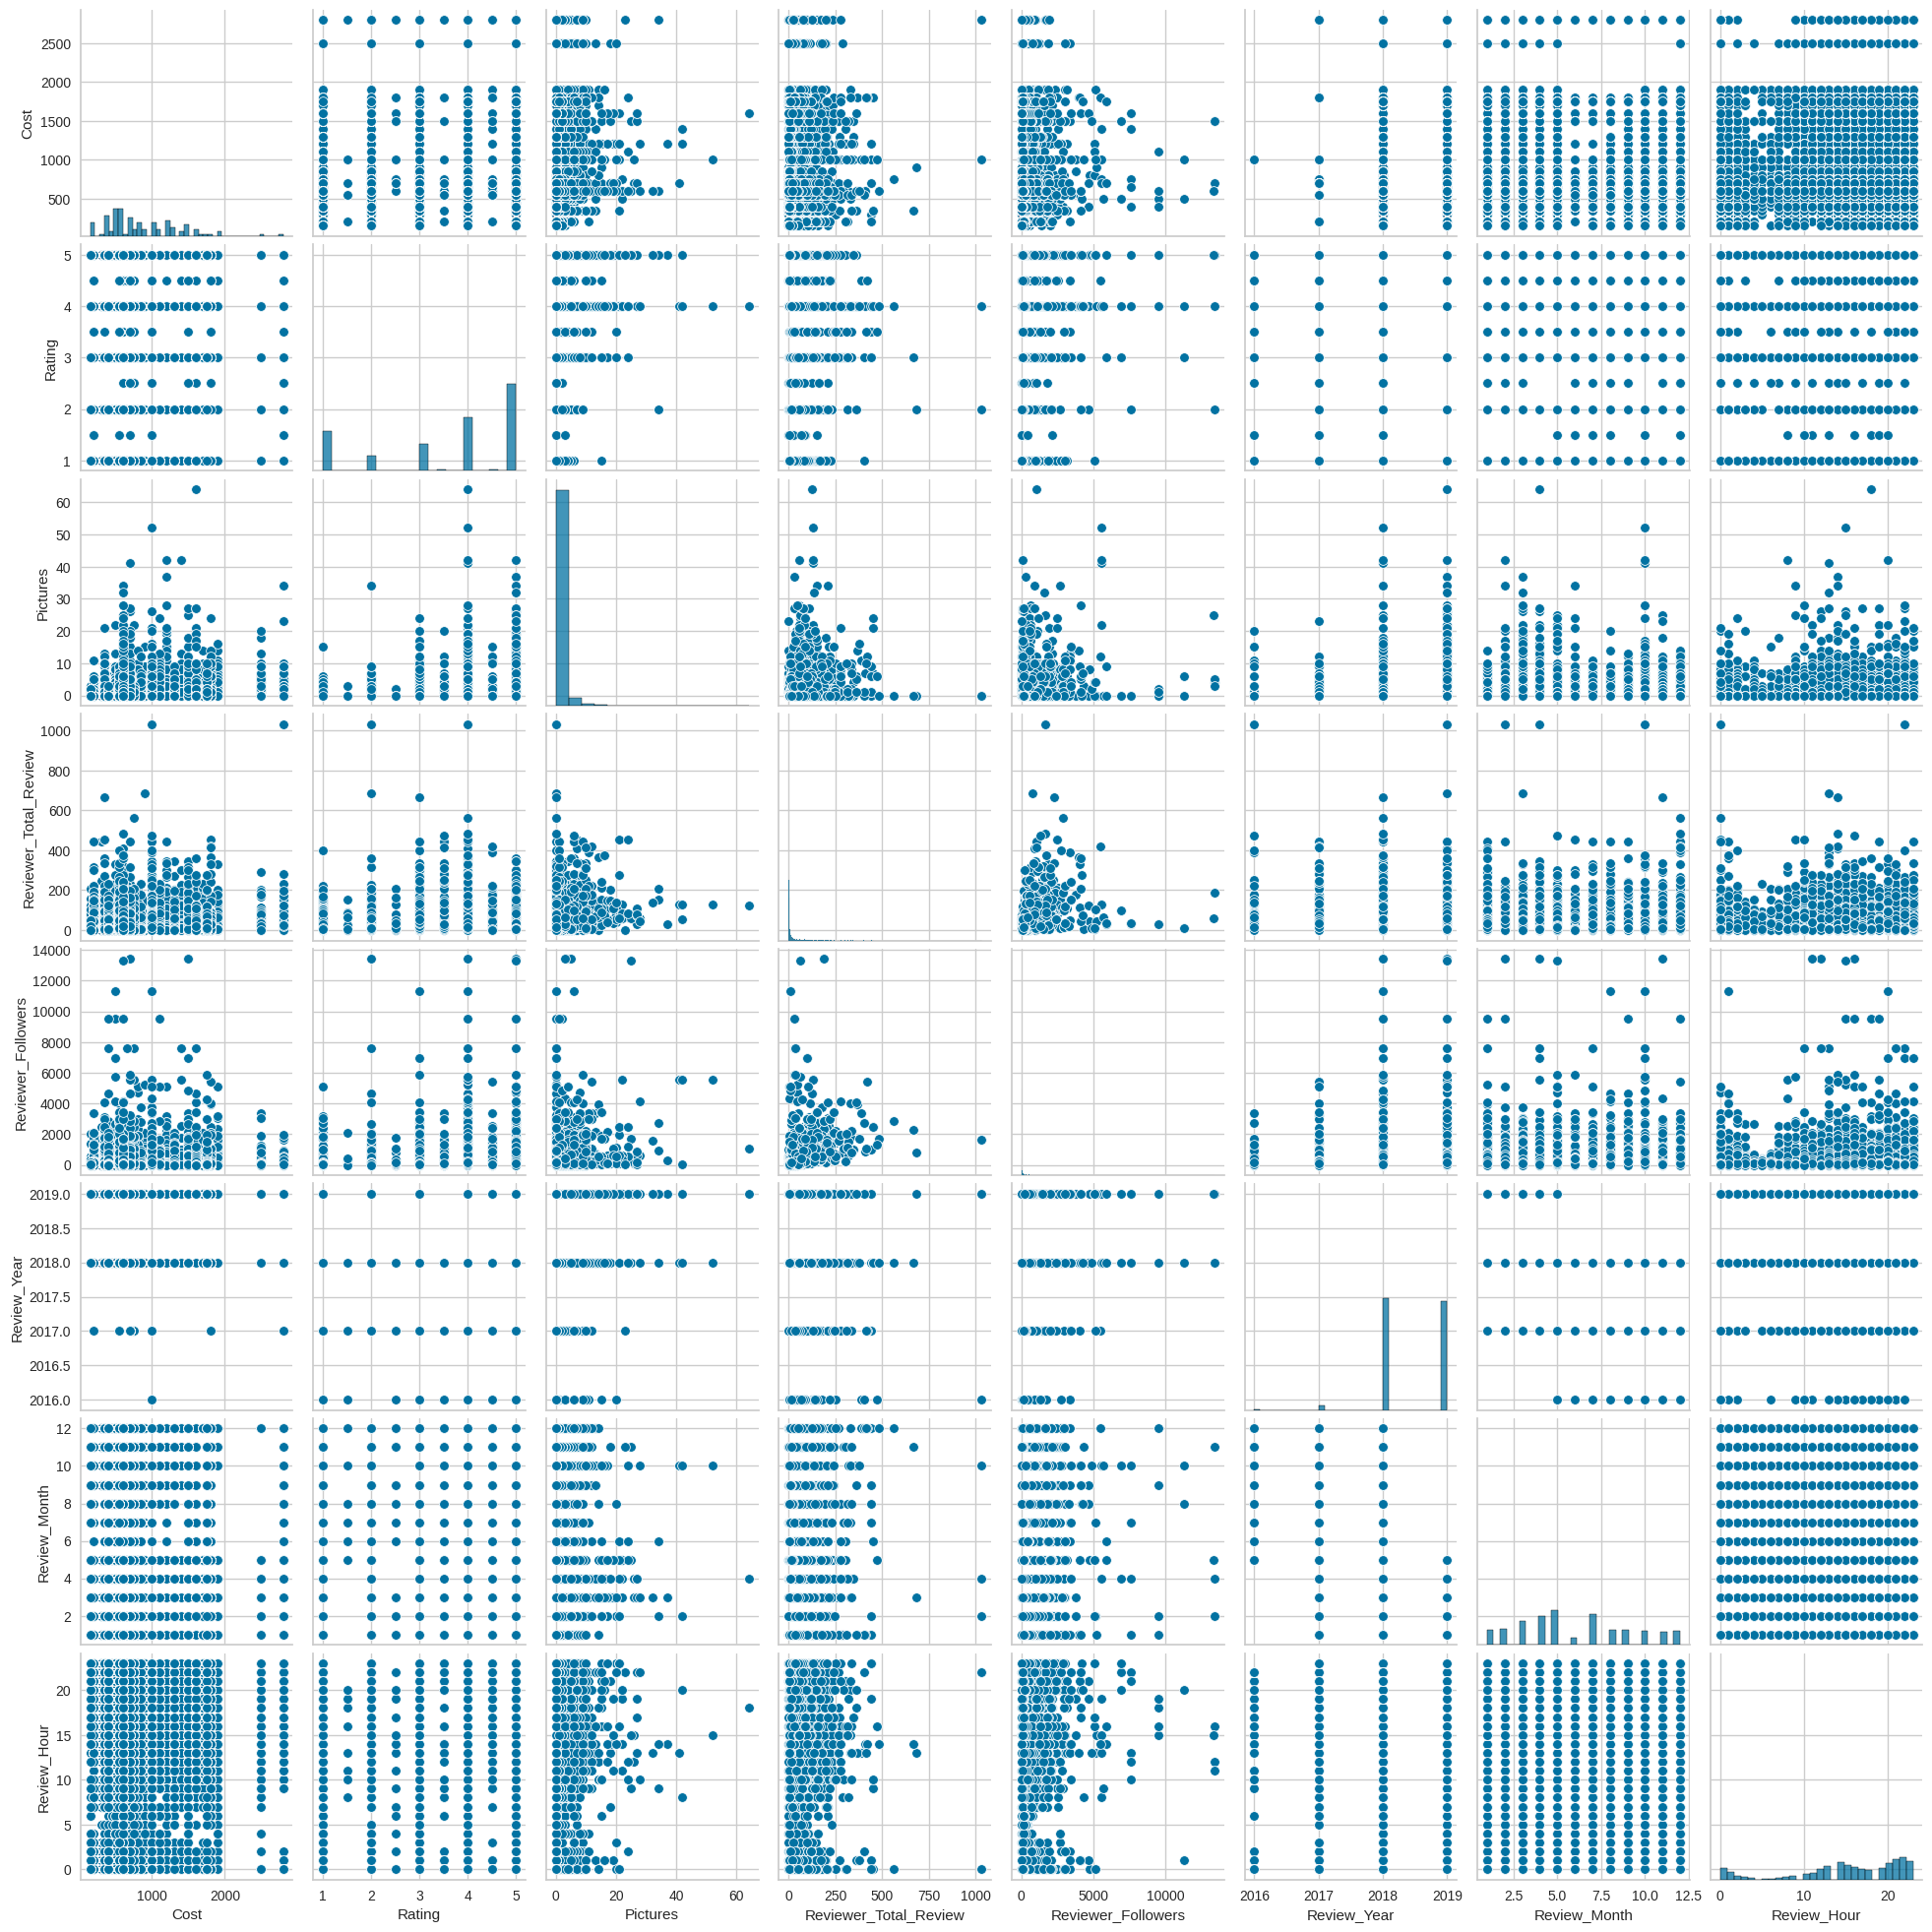

In [336]:
# Pair Plot visualization code
sns.pairplot(merged);

* It can be seen that there is no significant correlation between the given features in the merged dataframe.

# **Clustring**

In [337]:
cusine_df = merged[['Restaurant', 'Cost', 'Cuisines']].drop_duplicates(subset='Restaurant')
cusine_df.head()

,Restaurant,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
100,Paradise,800,"Biryani, North Indian, Chinese"
200,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts"
300,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
400,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med..."


In [338]:
# converting the cuisines to lower case
cusine_df['Cuisines'] = cusine_df['Cuisines'].apply(lambda x : x.lower());


In [339]:
# Removing spces from cuisine column.
cusine_df['Cuisines'] = cusine_df['Cuisines'].str.replace(' ','')
# Spliting the Words in cuisine.
cusine_df['Cuisines'] = cusine_df['Cuisines'].str.split(',')

In [340]:
# Overview on text cleaning.
cusine_df.head()


,Restaurant,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
100,Paradise,800,"[biryani, northindian, chinese]"
200,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
300,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
400,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."


In [341]:
# converting a list of labels for each sample into a binary indicator matrix
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

In [342]:
# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cusine_df = cusine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cusine_df.pop('Cuisines')),
                                                               index=cusine_df.index, columns=mlb.classes_))


In [343]:
# Overview
cusine_df.head()

,Restaurant,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
100,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
200,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
300,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
400,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [344]:
# Remove nan rating in Rating column.
df_reviews.dropna(subset=['Rating'],inplace=True)

In [345]:

# Change data type of rating column to float.
df_reviews['Rating']= df_reviews['Rating'].astype('float')

In [346]:
# Dropping the null Values from review column.
df_reviews.dropna(subset =['Review'], inplace=True)

In [347]:

# Grouping the restaurant on the basis of average rating.
ratings_df = df_reviews.groupby('Restaurant')['Rating'].mean().reset_index()

In [348]:
#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
df_cluster = cusine_df.merge(ratings_df, left_on='Restaurant',right_on='Restaurant')


In [349]:
df_cluster.head()

,Restaurant,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.70
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,3.21
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.34


In [350]:

# Removing commas from the cost variables.
df_cluster['Cost']= df_cluster['Cost'].replace(',','')

In [351]:
# Changing the data type of the cost column.
df_cluster['Cost']= df_cluster['Cost'].astype('float')

# **K-means Clustering Implimentation**


In [352]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to

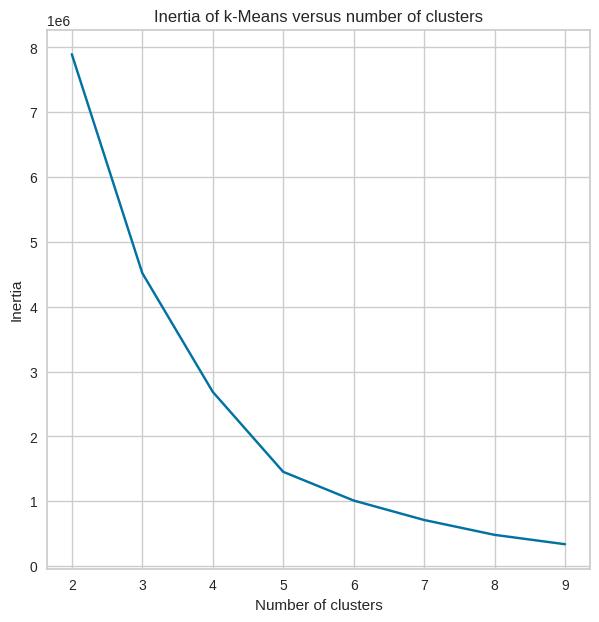

In [353]:
# Create a list of inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Restaurant',axis=1)).inertia_
          for i in range(8)]
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()


*  The plot show that many clusters we need to form in order to do k-means clustering. As per the chart we will be forming 5 clusters

In [354]:
# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Restaurant',axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=11)

In [355]:
# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(df_cluster.drop('Restaurant',axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [356]:
df_cluster['labels'] = cluster_lbl

In [357]:
# Creating the data frame for each cluster.
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [358]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

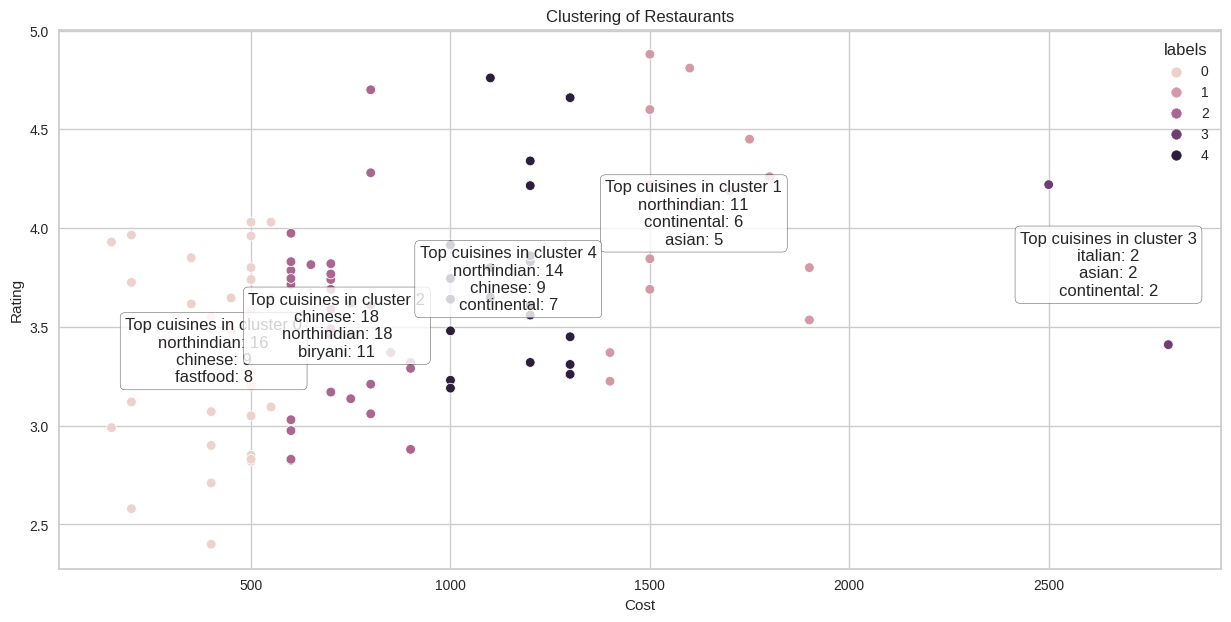

In [359]:
# Create a scatter plot of the clusters with annotations for top cuisines
plt.figure(figsize=(15,7))
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=df_cluster)
for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Restaurant', 'Cost', 'Rating', 'labels'], axis=1).sum().sort_values(ascending=False)[:3]
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.annotate(f'Top cuisines in cluster {i}\n{top_cuisines_str}',
                 xy=(df['Cost'].mean(), df['Rating'].mean()),
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
plt.show()

* For each cluster, the top three cuisines are identified and annotated on the plot. The annotation includes the name of the cluster, its centroid location (mean cost and mean rating), and the top three cuisines and their counts within the cluster. This plot can be used to visually identify how the restaurants are grouped and the dominant features of each cluster

# Conclusion

* Clustering and analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

* The clustering  provided insights into the grouping of restaurants based on their features, which can help in decision making for users and businesses.

* Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback can be achieved.